# 1 Twitter WeRateDogs Project

## 1.1 Gathering 

###  1.1.1 Gathering - twitter-archive-enhanced

In [1]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.close("all")
import seaborn as sns 
sns.set_style('darkgrid')
from datetime import time 


df_1 = pd.read_csv('twitter-archive-enhanced.csv')

df_1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


###  1.1.2 Gathering - image-predictions

In [2]:
import pandas as pd
import requests


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image-predictions.tsv', 'wb').write(r.content)

df_2 = pd.read_csv('image-predictions.tsv',sep='\t')

df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


###  1.1.3 Gathering - tweepy.API

In [3]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_3 = pd.DataFrame(df_list)
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 1.2 Assess

In [4]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
753,778774459159379968,NaN,NaN,2016-09-22 01:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: In case you haven't seen the mo...,7.580996e+17,4.196984e+09,2016-07-27 00:40:12 +0000,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",13,10,None,None,None,None,None
1908,674436901579923456,NaN,NaN,2015-12-09 03:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bailey. She plays with her food. Very chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
804,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
1078,739485634323156992,NaN,NaN,2016-06-05 15:54:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle. He's a heavy drinker and an avid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,None,None,None,None,None
416,822610361945911296,NaN,NaN,2017-01-21 01:02:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non-canines like this V...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822610361...,12,10,None,None,None,None,None


In [5]:
df_1.shape

(2356, 17)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df_1['tweet_id'].duplicated().sum()

0

In [9]:
df_1['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [10]:
with pd.option_context('display.max_colwidth', None):
  display(df_1.text.head())

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [11]:
df_1['expanded_urls'].isnull().sum()

59

In [12]:
with pd.option_context('display.max_colwidth', None):
  display(df_1.expanded_urls.head(50))

0                                                                                                                                                                                                     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                                                                                     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                                                                                     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                                                                                     https://twitter.

In [13]:
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
x = df_1.query('rating_numerator <= 5')
    
with pd.option_context('display.max_colwidth', None):
  display(x.sample(30))  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Zeek. He is a grey Cumulonimbus. Zeek is hungry. Someone should feed Zeek asap. 5/10 absolutely terrifying https://t.co/fvVNScw8VH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377374486528/photo/1,5,10,Zeek,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246314430465/photo/1,4,10,Alice,None,None,None,None
2222,668466899341221888,NaN,NaN,2015-11-22 16:31:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668466899341221888/photo/1,4,10,a,None,None,None,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,10,Bernie,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the holidays to end. 5/10 https://t.co/DnNweb5eTO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619965411328/photo/1,5,10,None,None,None,pupper,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204919246848/photo/1,4,10,None,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,10,None,None,None,None,None
1727,679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Penelope. She's a bacon frise. Total babe (lol get it like the movie). Doesn't bark tho. 5/10 very average dog https://t.co/SDcQYg0HSZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062409191424/photo/1,5,10,Penelope,None,None,None,None
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033169788928/photo/1,5,10,Juckson,None,None,None,None


In [15]:
y = df_1.query('rating_numerator >= 15')
    
with pd.option_context('display.max_colwidth', None):
  display(y)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [16]:
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_1['rating_denominator'][df_1['rating_denominator'] != 10].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [18]:
with pd.option_context('display.max_colwidth', None):
  display(df_1[df_1['rating_denominator'] !=10].text)


313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

In [19]:
df_1['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Acro         1
Baron        1
Katie        1
Craig        1
Rufio        1
Name: name, Length: 957, dtype: int64

In [20]:
df_1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
list(df_1.name[df_1.name.isin(df_1.name[df_1.name.str.islower()])])


['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [22]:
df_2.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False
1721,819588359383371776,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True


In [23]:
df_2.shape

(2075, 12)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_2['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
df_3.sample(20)

,tweet_id,retweet_count,favorite_count
466,817120970343411712,3011,13367
2121,670385711116361728,234,593
1888,674767892831932416,883,1981
2058,671182547775299584,378,1193
1342,704499785726889984,1124,3212
1890,674754018082705410,488,1456
1434,697255105972801536,1315,3316
1053,742385895052087300,2266,7457
515,810984652412424192,1655,5927
1752,678798276842360832,1350,3804


In [28]:
df_3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# After Visaual and programatic assessment .

### 1.2.1 Quality

'df_1' dataset :  
* [1] (in_reply_to_status_id ,in_reply_to_user_id) not null values == validity issue.        
* [2] (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) not null values == validity issue  
* [3] timestamp column isn't date time.  
* [4] extract source of tweet from source column and categorize it. 
* [5] text column contain urls.
* [6] expanded_urls have NaN values.
* [7] some expanded_urls contain duplicated urls in the same value.
* [8] some rating_denominator value == accuracy issue.
* [9] some rating_numerator value not == validity issue.
* [10] doggo,floofer,pupper,puppo columns has 'none' for missing values.  
* [11] some name column values == validity issue.  

'df_2' dataset :   
* [12] img_num column == consistency .
* [13] df_2 should contain only the highest prediction confident of breed and the breed name instead of 3 predictions.


### 1.2.2 Tidness
* [1] 'df_1' table : doggo,floofer,pupper,puppo are variable not columns.  
* [2] All should be in one dataset.


## 1.3 Clean

In [31]:
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

### 1.3.1 Quality


#### Define

* 'df_1' dataset :(in_reply_to_status_id ,in_reply_to_user_id) not_null values == validity issue.

#### Code

In [32]:
## null values are the required rows so I used is_null method to drop not_null rows.

df1_clean= df1_clean[df1_clean['in_reply_to_status_id'].isnull()]
df1_clean= df1_clean[df1_clean['in_reply_to_user_id'].isnull()]

df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

#### Define

* 'df_1' dataset :(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) not_null values == validity issue.



#### Code

In [34]:
## null values are the required rows so I used is_null method to drop not_null rows.

df1_clean= df1_clean[df1_clean['retweeted_status_id'].isnull()]
df1_clean= df1_clean[df1_clean['retweeted_status_user_id'].isnull()]
df1_clean= df1_clean[df1_clean['retweeted_status_timestamp'].isnull()]

df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [35]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define 

* columns ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id' ] not required


#### Code

In [36]:
## drop columns ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id' ]
df1_clean = df1_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp',
                                    'in_reply_to_status_id', 'in_reply_to_user_id' ], axis=1)

df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [37]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define

* 'df_1' dataset : timestamp column is string instead of date time.


#### Code

In [38]:
## use to_datetime method

df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [39]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define

* 'df_1' dataset : extract source of tweet from source column and categorize it.

#### Code

In [40]:
## extract unique sources .

df1_clean['source'] = df1_clean['source'].map(lambda x: x.lower())
df1_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">twitter for iphone</a>',
       '<a href="http://twitter.com" rel="nofollow">twitter web client</a>',
       '<a href="http://vine.co" rel="nofollow">vine - make a scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">tweetdeck</a>'],
      dtype=object)

In [41]:
## extract unique values string between '>' , '<' from column as source.

df1_clean['source'] = df1_clean['source'].str.split('>').str[1]
df1_clean['source'] = df1_clean['source'].str.split('<').str[0]
df1_clean['source'] = df1_clean['source'].astype('category')

df1_clean['source'].value_counts()

twitter for iphone     1964
vine - make a scene      91
twitter web client       31
tweetdeck                11
Name: source, dtype: int64

#### Test

In [42]:
df1_clean['source'].value_counts()

twitter for iphone     1964
vine - make a scene      91
twitter web client       31
tweetdeck                11
Name: source, dtype: int64

In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define 

* 'df_1' dataset : text column contain urls.

#### Code

In [44]:
## replace url with space.
df1_clean['text'] = df1_clean['text'].str.replace(r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)',
                                                  "")        

#### Test

In [45]:
with pd.option_context('display.max_colwidth', None):
  display(df1_clean.iloc[4])

tweet_id                                                                                                                                       891327558926688256
timestamp                                                                                                                               2017-07-29 16:00:24+00:00
source                                                                                                                                         twitter for iphone
text                  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
expanded_urls                     https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
rating_numerator                                                                                                                                               12
rating_denominator          

In [46]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define 

* 'df_1' dataset : expanded_urls have NaN values.

#### Code

In [47]:
## not_null values are the required rows so I used not_null method to drop null rows.

df1_clean= df1_clean[df1_clean['expanded_urls'].notnull()]

df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,twitter for iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,twitter for iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [48]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define 

* 'df_1' dataset : some expanded_urls contain duplicated urls in the same value.

#### Code

In [49]:
## divid dataset to 2 datasets by expanded_urls depend on contain ',' or not .
c1 = df1_clean.copy()
nc2 = df1_clean.copy()

c1 = c1[c1['expanded_urls'].str.contains(',')]
nc2 = nc2[~nc2['expanded_urls'].str.contains(',')]

## extract one url from expanded_urls column in dataset contain ',' .
c1['expanded_urls'] = c1['expanded_urls'].str.split(',', expand=True)[1]

## concat 2 new datasets.
df1_clean = pd.concat([c1,nc2])


#### Test

In [50]:
with pd.option_context('display.max_colwidth', None):
  display(df1_clean.sample(50))

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
849,766008592277377025,2016-08-17 20:27:34+00:00,twitter for iphone,This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive,https://twitter.com/dog_rates/status/766008592277377025/photo/1,11,10,Angel,None,None,None,None
873,761334018830917632,2016-08-04 22:52:29+00:00,twitter for iphone,This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup,https://twitter.com/dog_rates/status/761334018830917632/photo/1,10,10,Bruce,None,None,None,None
83,876537666061221889,2017-06-18 20:30:39+00:00,twitter for iphone,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
21,887705289381826560,2017-07-19 16:06:48+00:00,twitter for iphone,This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic,https://twitter.com/dog_rates/status/887705289381826560/photo/1,13,10,Jeffrey,None,None,None,None
1439,696894894812565505,2016-02-09 03:14:25+00:00,twitter for iphone,These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10,https://twitter.com/dog_rates/status/696894894812565505/photo/1,9,10,None,None,None,None,None
575,801115127852503040,2016-11-22 17:28:25+00:00,twitter for iphone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,https://twitter.com/dog_rates/status/801115127852503040/photo/1,12,10,Bones,doggo,None,pupper,None
752,778990705243029504,2016-09-22 16:13:51+00:00,twitter for iphone,This is Jay. He's really h*ckin happy about the start of fall. Sneaky tongue slip in 2nd pic. 11/10 snuggly af,https://twitter.com/dog_rates/status/778990705243029504/photo/1,11,10,Jay,None,None,None,None
1704,680889648562991104,2015-12-26 23:15:17+00:00,twitter for iphone,This is Cheesy. It's her birthday. She's patiently waiting to eat her party muffin. 9/10 happy birthday pup,https://twitter.com/dog_rates/status/680889648562991104/photo/1,9,10,Cheesy,None,None,None,None
1684,681679526984871937,2015-12-29 03:33:58+00:00,twitter for iphone,Can you spot Toby the guilty pupper? 7/10 would be higher but he made quite the mess shredding his stuffed pals,https://twitter.com/dog_rates/status/681679526984871937/photo/1,7,10,None,None,None,pupper,None
117,870063196459192321,2017-05-31 23:43:25+00:00,twitter for iphone,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride,https://twitter.com/dog_rates/status/870063196459192321/photo/1,14,10,Clifford,None,None,None,None


In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 4 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define

* 'df_1' dataset : some rating_denominator value == accuracy issue.

#### Code

In [52]:
## rating_denominator value should be 10 acc. to unique classification , so I will drop values not equal 10 . 

df1_clean = df1_clean.loc[df1_clean['rating_denominator'] == 10]

#### Test

In [53]:
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.077000e+03,2077.000000,2077.0
mean,7.366544e+17,11.699567,10.0
std,6.725115e+16,39.845599,0.0
min,6.660209e+17,0.000000,10.0
25%,6.766175e+17,10.000000,10.0
50%,7.095662e+17,11.000000,10.0
75%,7.880396e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 4 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   category           
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define

* 'df_1' dataset : some rating_numerator value not == validity issue.

#### Code

In [55]:
## rating_numerators less than or equal 5 most of them are not dog ratings , I will drop them .
df1_clean = df1_clean [df1_clean['rating_numerator'] >= 6]

## rating_numerators more than 100 has consistency issue , I will drop them .
df1_clean = df1_clean [df1_clean['rating_numerator'] <= 100]

## some rating_numerators between 5 and 100 are flots .
## I will extract the rating_numerator again from text and convert it to float.
df1_clean['rating_numerator'] = df1_clean['text'].str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')


#### Test

In [56]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 4 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   int64              
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   category           
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   float64            
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               1993 non-null   object             
 9   floofer             1993 non-null   object             
 10  pupper              1993 non-null   object             
 11  puppo               1993 non-null   object             
dtypes: category(1), datetime64[ns, UTC

In [57]:
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.993000e+03,1993.000000,1993.0
mean,7.386751e+17,10.887747,10.0
std,6.747765e+16,1.660368,0.0
min,6.660209e+17,6.000000,10.0
25%,6.776740e+17,10.000000,10.0
50%,7.127178e+17,11.000000,10.0
75%,7.909874e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


#### Define

* 'df_1' dataset : doggo,floofer,pupper,puppo columns have 'none' for missing values.

#### Code

In [58]:
## replace none by "" , combine columns doggo,floofer,pupper,puppo as dog_stage.
df1_clean.iloc[:, -4:  ] = df1_clean.iloc[:, -4:  ].replace('None','')
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

## drop columns doggo,floofer,pupper,puppo , replace "" by NaN .
df1_clean = df1_clean.drop(columns=['doggo','floofer','pupper','puppo'] , axis = 1)
df1_clean.iloc[:, -1] = df1_clean.iloc[:, -1].replace('',np.nan)
df1_clean.dog_stage = df1_clean.dog_stage.astype('category')
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
4,891327558926688256,2017-07-29 16:00:24+00:00,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN
10,890006608113172480,2017-07-26 00:31:25+00:00,twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,NaN
13,889638837579907072,2017-07-25 00:10:02+00:00,twitter for iphone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,NaN
...,...,...,...,...,...,...,...,...,...
2350,666050758794694657,2015-11-16 00:30:50+00:00,twitter for iphone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10,a,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,twitter for iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,twitter for iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,NaN


#### Test

In [59]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 4 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   int64              
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   category           
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   float64            
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   dog_stage           332 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 129.0+ KB


#### Define

* 'df_1' dataset : some name column values == validity issue.

#### Code

In [60]:
## replace 'a' , 'an' in name columns by pattern in text .
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df1_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        df1_clean.loc[index,'name'] = np.nan

In [61]:
df1_clean.name = df1_clean.name.replace('None',np.nan)

#### Test

In [62]:
df1_clean.name.value_counts(dropna = False)

NaN         577
Lucy         11
Charlie      11
Oliver       10
Cooper       10
           ... 
Mac           1
Major         1
Rizzo         1
Terrance      1
Rhino         1
Name: name, Length: 954, dtype: int64

In [63]:
df1_clean.name.unique()

array(['Franklin', 'Jax', nan, 'Koda', 'Ted', 'Zeke', 'Ralphus', 'Gerald',
       'Canela', 'Maya', 'Mingus', 'Roscoe', 'Lola', 'Rusty', 'Alfy',
       'Koko', 'Bella', 'Jesse', 'Romeo', 'Snoopy', 'Shadow', 'Emmy',
       'Aja', 'Dante', 'Nelly', 'Ginger', 'Sebastian', 'Sierra', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Cody', 'Rumble',
       'Clifford', 'Scout', 'Cooper', 'Harold', 'Lili', 'Jamesy', 'Coco',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Quinn', 'Zooey',
       'Jersey', 'Lorenzo', 'Trooper', 'Thor', 'Cermet', 'quite',
       'Marlee', 'Einstein', 'Rumpole', 'Benny', 'Jarod', 'Iggy', 'Snoop',
       'Kyle', 'Riley', 'Boomer', 'Noosh', 'Rontu', 'Furzey', 'Daisy',
       'Tuck', 'Barney', 'Vixen', 'Mimosa', 'Tycho', 'Indie', 'George',
       'Bentley', 'Maddie', 'Monty', 'Sojourner', 'Odie', 'Stanley',
       'Waffles', 'Vincent', 'Oliver', 'Eli', 'Tucker', 'Wilson',
       'Charlie', 'Bronte', 'Poppy', 'Gidget', 'Rhino', 'Willow', 'Eevee',
       'Migue

#### Define

* df_2 dataset : img_num column == consistency .

#### Code

In [64]:
## drop img_num column
df2_clean = df2_clean.drop(['img_num'] , axis = 1)

#### Test

In [65]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [66]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


#### Define

* df_2 dataset : df_2 should contain only the highest prediction confident of breed and the breed name instead of 3 predictions.

#### Code

In [67]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [68]:
## choose the maximum p_conf which will be the breed , use conditional method.

df2_clean["pic_conf"] = df2_clean[["p1_conf", "p2_conf","p3_conf"]].max(axis=1)

conditions = [(df2_clean["pic_conf"] == df2_clean['p1_conf']  ) , (df2_clean["pic_conf"] == df2_clean['p3_conf']  ) ,
              (df2_clean["pic_conf"] == df2_clean['p2_conf']  )]

choices = [df2_clean['p1'], df2_clean['p2'],df2_clean['p3']]

df2_clean["breed"] = np.select(conditions, choices)
df2_clean["breed"] = df2_clean["breed"].astype('category')

## drop p and conf columns not required.
df2_clean = df2_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'] , axis = 1)




#### Test

In [69]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   pic_conf  2075 non-null   float64 
 3   breed     2075 non-null   category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 65.8+ KB


In [70]:
df2_clean

,tweet_id,jpg_url,pic_conf,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.170278,paper_towel
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,Chihuahua


#### Define

 * df_1 , df_2 ,df_3 datasets : all should be in one dataset.

#### Code

In [71]:
sub_master = pd.merge(df1_clean, df2_clean , how='inner' , on=["tweet_id"])
twitter_master = pd.merge(sub_master, df3_clean , how='inner' , on=["tweet_id"])
twitter_master.reset_index(drop = True)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,pic_conf,breed,retweet_count,favorite_count
0,891327558926688256,2017-07-29 16:00:24+00:00,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,basset,9774,41048
1,890971913173991426,2017-07-28 16:27:12+00:00,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,0.341703,Appenzeller,2158,12041
2,890729181411237888,2017-07-28 00:22:40+00:00,twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,0.566142,Pomeranian,16716,56848
3,890006608113172480,2017-07-26 00:31:25+00:00,twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,0.957979,Samoyed,7624,31166
4,889638837579907072,2017-07-25 00:10:02+00:00,twitter for iphone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,0.991650,French_bulldog,4735,27672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,666050758794694657,2015-11-16 00:30:50+00:00,twitter for iphone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,0.651137,Bernese_mountain_dog,60,136
1867,666044226329800704,2015-11-16 00:04:52+00:00,twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,Rhodesian_ridgeback,147,311
1868,666033412701032449,2015-11-15 23:21:54+00:00,twitter for iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,German_shepherd,47,128
1869,666029285002620928,2015-11-15 23:05:30+00:00,twitter for iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,redbone,48,132


#### Test

In [72]:
twitter_master.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,pic_conf,breed,retweet_count,favorite_count
1427,676946864479084545,2015-12-16 02:08:04+00:00,twitter for iphone,This pups goal was to get all four feet as clo...,https://twitter.com/dog_rates/status/676946864...,12.0,10,NaN,NaN,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,0.752707,Pekinese,426,1844
437,689623661272240129,2016-01-20 01:41:08+00:00,twitter for iphone,This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10.0,10,Lucy,pupper,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,0.279604,toy_poodle,748,2467
375,711363825979756544,2016-03-20 01:28:47+00:00,twitter for iphone,"""Please, no puparazzi"" 11/10",https://twitter.com/dog_rates/status/711363825...,11.0,10,NaN,NaN,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,0.750906,Pembroke,1287,3996
856,761334018830917632,2016-08-04 22:52:29+00:00,twitter for iphone,This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10.0,10,Bruce,NaN,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,0.822936,Norwegian_elkhound,1669,5792
179,802323869084381190,2016-11-26 01:31:31+00:00,twitter for iphone,This is Severus. He's here to fix your cable. ...,https://twitter.com/dog_rates/status/802323869...,13.0,10,Severus,NaN,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,0.765069,home_theater,6808,18124
1565,672609152938721280,2015-12-04 02:51:33+00:00,twitter for iphone,This is Caryl. Likes to get in the microwave. ...,https://twitter.com/dog_rates/status/672609152...,9.0,10,Caryl,NaN,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,0.981946,microwave,424,1180
1255,687704180304273409,2016-01-14 18:33:48+00:00,twitter for iphone,Say hello to Blakely. He thinks that's a hat. ...,https://twitter.com/dog_rates/status/687704180...,9.0,10,Blakely,pupper,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,0.956063,miniature_pinscher,950,2660
1630,671109016219725825,2015-11-29 23:30:32+00:00,twitter for iphone,This is Toby. He asked for chocolate cake for ...,https://twitter.com/dog_rates/status/671109016...,8.0,10,Toby,NaN,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,0.855959,basenji,478,1225
1213,691675652215414786,2016-01-25 17:35:00+00:00,twitter for iphone,This is Richie and Plip. They are the best of ...,https://twitter.com/dog_rates/status/691675652...,10.0,10,Richie,NaN,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,0.182898,Chihuahua,577,2116
555,867900495410671616,2017-05-26 00:29:37+00:00,twitter for iphone,Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12.0,10,NaN,NaN,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,0.522644,Labrador_retriever,4439,24964


In [73]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871 entries, 0 to 1870
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1871 non-null   int64              
 1   timestamp           1871 non-null   datetime64[ns, UTC]
 2   source              1871 non-null   category           
 3   text                1871 non-null   object             
 4   expanded_urls       1871 non-null   object             
 5   rating_numerator    1871 non-null   float64            
 6   rating_denominator  1871 non-null   int64              
 7   name                1369 non-null   object             
 8   dog_stage           300 non-null    category           
 9   jpg_url             1871 non-null   object             
 10  pic_conf            1871 non-null   float64            
 11  breed               1871 non-null   category           
 12  retweet_count       1871 non-null 

## 1.4 Saving master sheet

In [74]:
twitter_master.to_csv('twitter_master.csv')

## 1.5 Visualization

From Dogs' lovers :
Your dog is your best friend but there's a lot you might not know about him! Whether your dog is young or old, these fun facts about dogs will give you new reasons to love your furry friend :
* Dogs love games such as hide and seek! Hide, then call your pup's name so she can try to find you.    
* Dogs can learn more than 1000 words.  
* Big happy "helicopter" tail wagging is one sign of a really nice dog.  
* Upright, stiff, rapid tail movement is not wagging or "friendly" but indicates a dog who's rather excited and focused.  
* Dogs grow to half their body weight in the first four to five months!  
* Then take a year or more to gain the other half of their body weight.  
* Tired Dogs get cranky just like little kids. If you have a fussy puppy, try nap time.  

The twitter page WeRateDogs is excellent page for dog lovers as they rate dogs depend on unique rating above 10 and they displays on the page beaytiful dogs.

Here is some insights about twitter page WeRateDogs:
* The highest frequent year of tweets was 2016 .  
* The highest frequent source for tweets was twitter for iphone .
* The most beloved dog stage is pupper then doggo depend on favourite_count.
* The most beloved dog stage is doggo-puppo depend on tweet text  .
* The most beloved dog name is Aja then Albus .
* Positive correlation betwwen retweet count and favourite_count .

### 1.5.1 Tweet Count / year

#### Code & Figure [1]

* Tweet frequency / year :  
The highest frequent year of tweets was 2016

<Figure size 432x288 with 0 Axes>

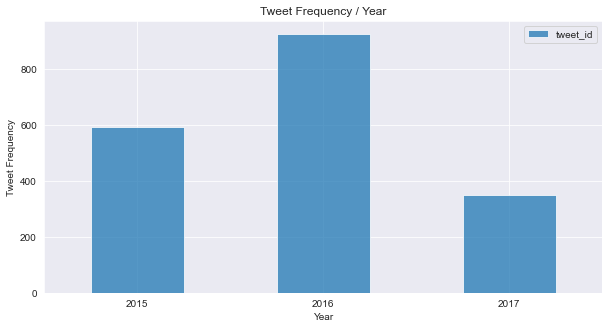

<Figure size 432x288 with 0 Axes>

In [75]:
ax = twitter_master.groupby(twitter_master.timestamp.dt.year).tweet_id.count()
ax = pd.DataFrame(ax)
ax.plot(kind = 'bar' ,xlabel='Year', ylabel='Tweet Frequency',figsize=(10,5),title='Tweet Frequency / Year',alpha=0.75, rot=0)
plt.figure()

#### Code & Figure [2]

* Tweet count / Source :  
The highest frequent source for tweets was twitter for iphone

<Figure size 432x288 with 0 Axes>

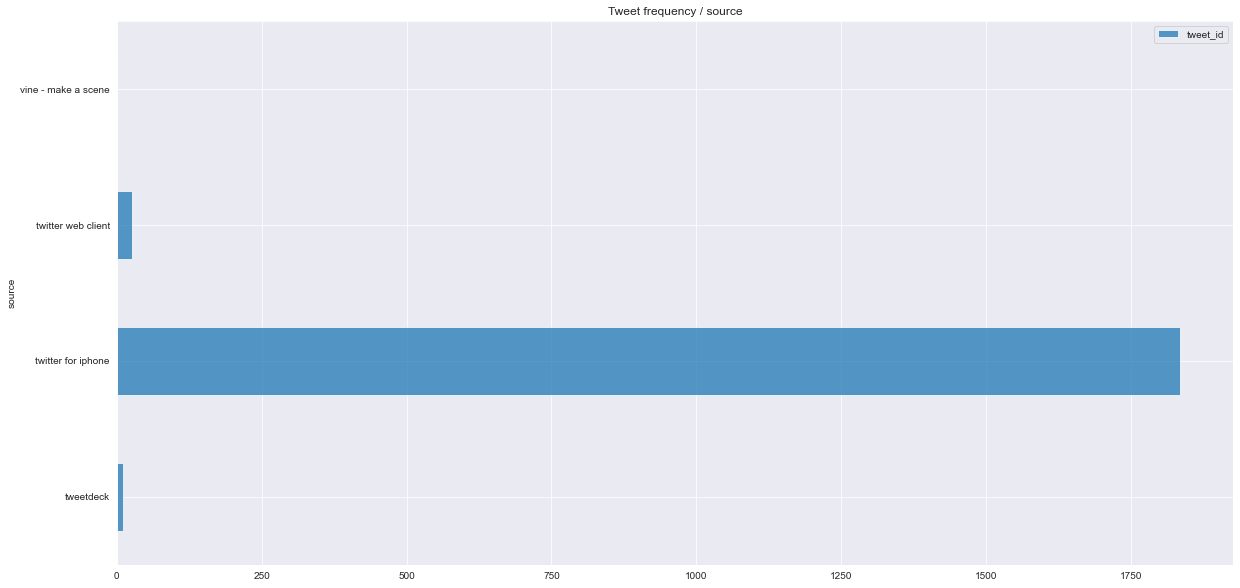

<Figure size 432x288 with 0 Axes>

In [76]:
ay = twitter_master.groupby(twitter_master.source).tweet_id.count()
ay = pd.DataFrame(ay)
ay.plot(kind = 'barh' ,xlabel='source', ylabel='Tweet frequency',figsize=(20,10),title='Tweet frequency / source',alpha=0.75, rot=0)
plt.figure()

#### Code & Figure [3]

* Beloved dog_stage from likes(favourite_count)  :  
The most beloved dog stage is pupper then doggo depend on favourite_count  .

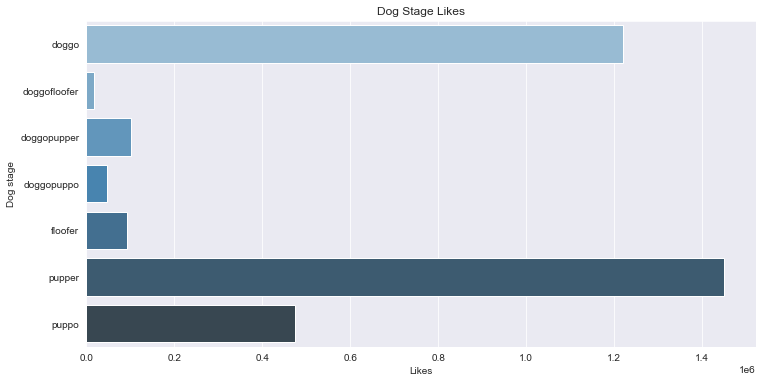

In [77]:
dog_stage_favorite = twitter_master.groupby(['dog_stage'],as_index=False).favorite_count.sum()

dog_stage_favorite
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = dog_stage_favorite.favorite_count, y=dog_stage_favorite.dog_stage,  palette='Blues_d' )
ax.set(xlabel='Likes', ylabel='Dog stage', title='Dog Stage Likes')
plt.show()

#### Code & Figure [4]

* Beloved dog_stage from likes(favourite_count)  :  
The most beloved dog stage is doggo-puppo depend on tweet text  .

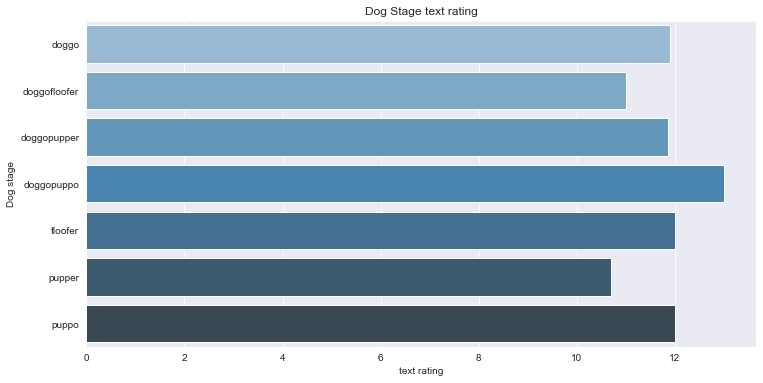

In [78]:
dog_stage_favorite = twitter_master.groupby(['dog_stage'],as_index=False).rating_numerator.mean()

dog_stage_favorite
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = dog_stage_favorite.rating_numerator, y=dog_stage_favorite.dog_stage,  palette='Blues_d' )
ax.set(xlabel='text rating', ylabel='Dog stage', title='Dog Stage text rating')
plt.show()

#### Code & Figure [5]

* Beloved dog name from likes(favourite_count)  :  
The most beloved dog name is Aja then Albus .

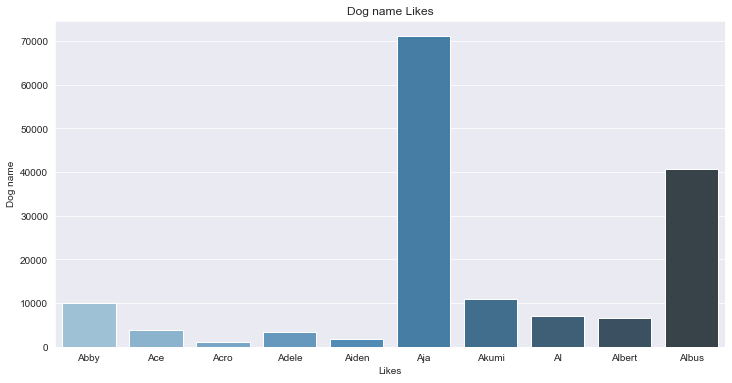

In [79]:
freq_name = twitter_master.groupby(['name'],as_index=False).favorite_count.sum()
freq_name.favorite_count.sort_values(ascending = False)
freq_name = freq_name.head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=freq_name.name, y  = freq_name.favorite_count, palette='Blues_d' ,ax=ax)
ax.set(xlabel='Likes', ylabel='Dog name', title='Dog name Likes')
plt.show()

#### Code & Figure [5]

* Relation betwwen retweet_count & favourite_count :  
Positive correlation betwwen retweet count and favourite_count .

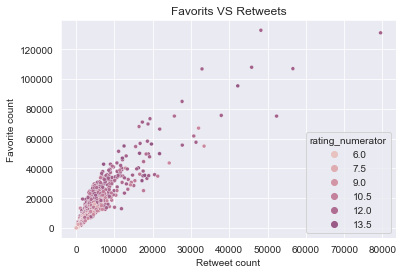

In [80]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=twitter_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()